### Task 1

C:\Users\Durga Prasad\AppData\Local\Temp\ipykernel_27728\1564286860.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=titles, y=ratings, palette="viridis")


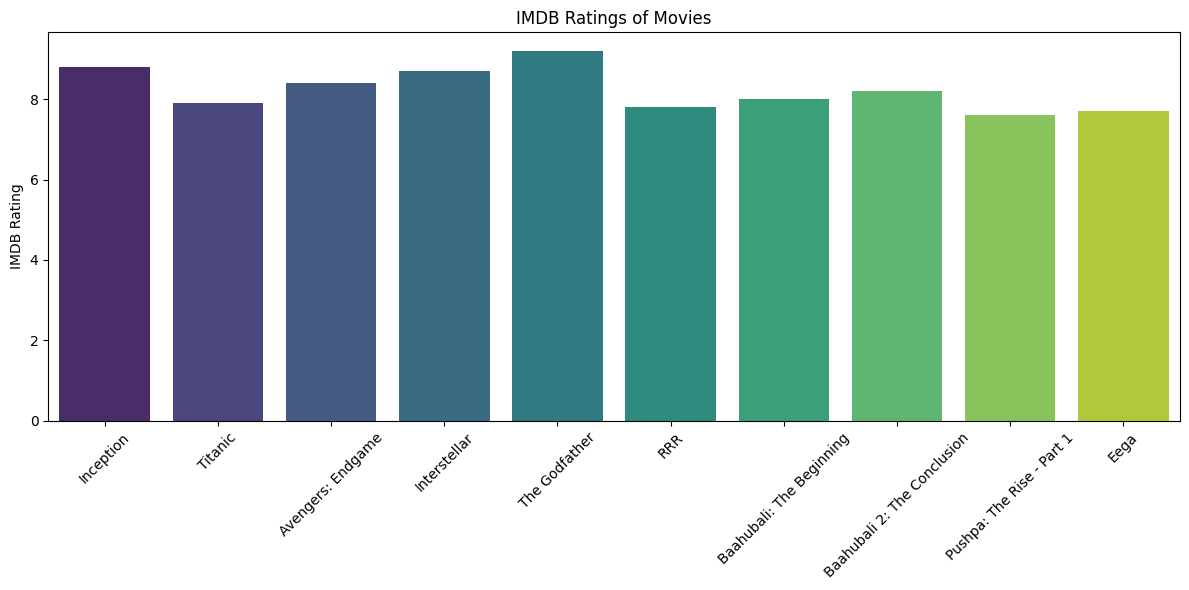

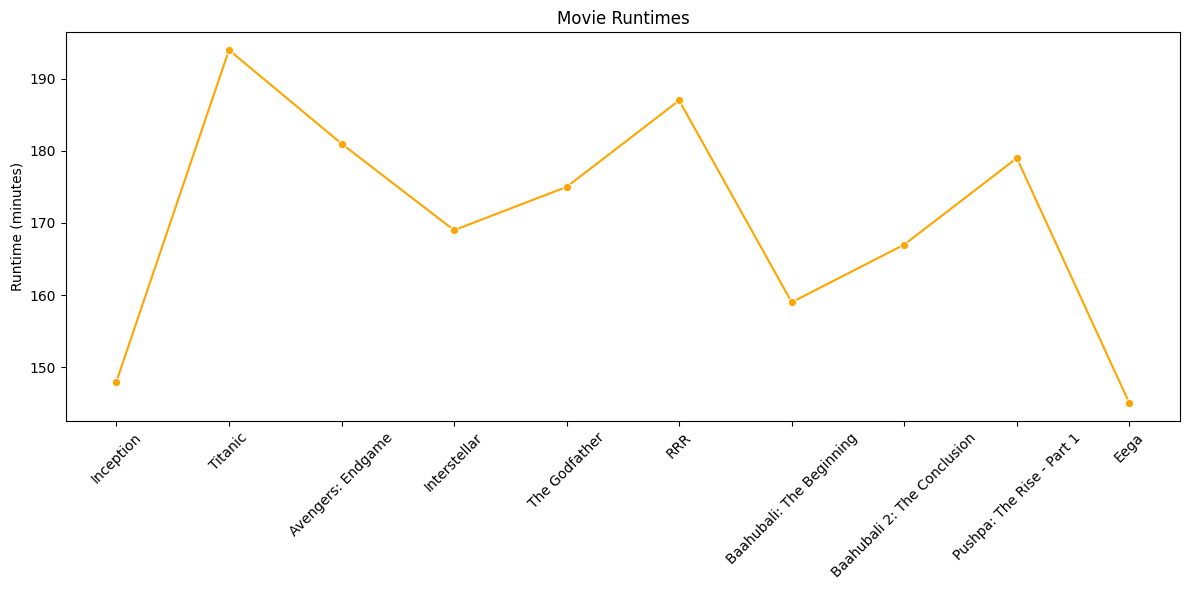

C:\Users\Durga Prasad\AppData\Local\Temp\ipykernel_27728\1564286860.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(genre_count.keys()), y=list(genre_count.values()), palette="coolwarm")


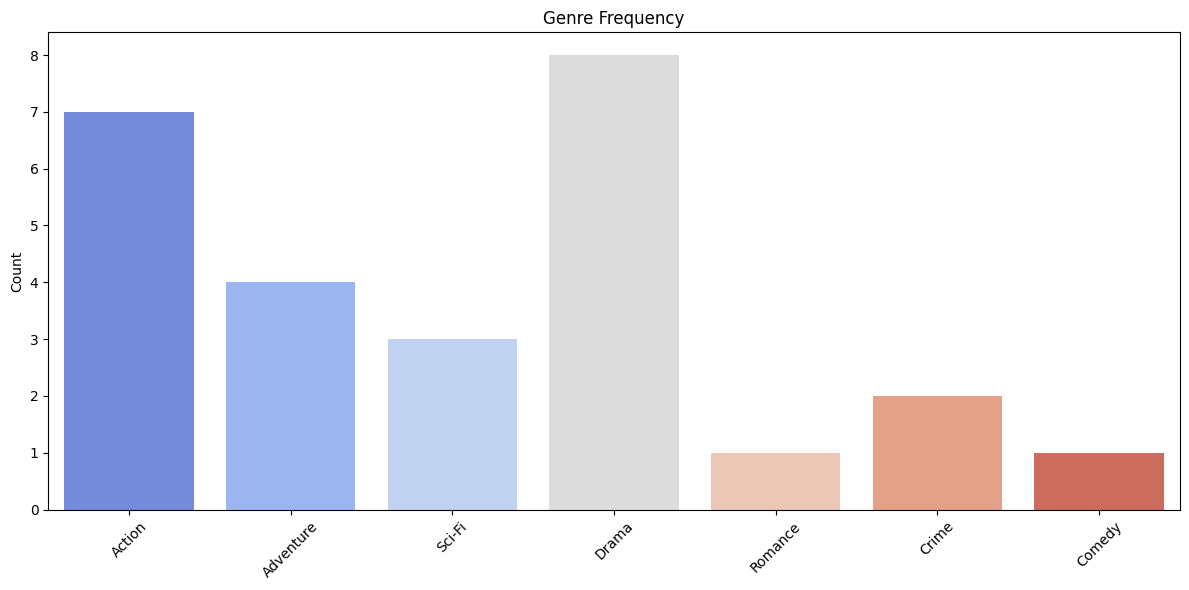

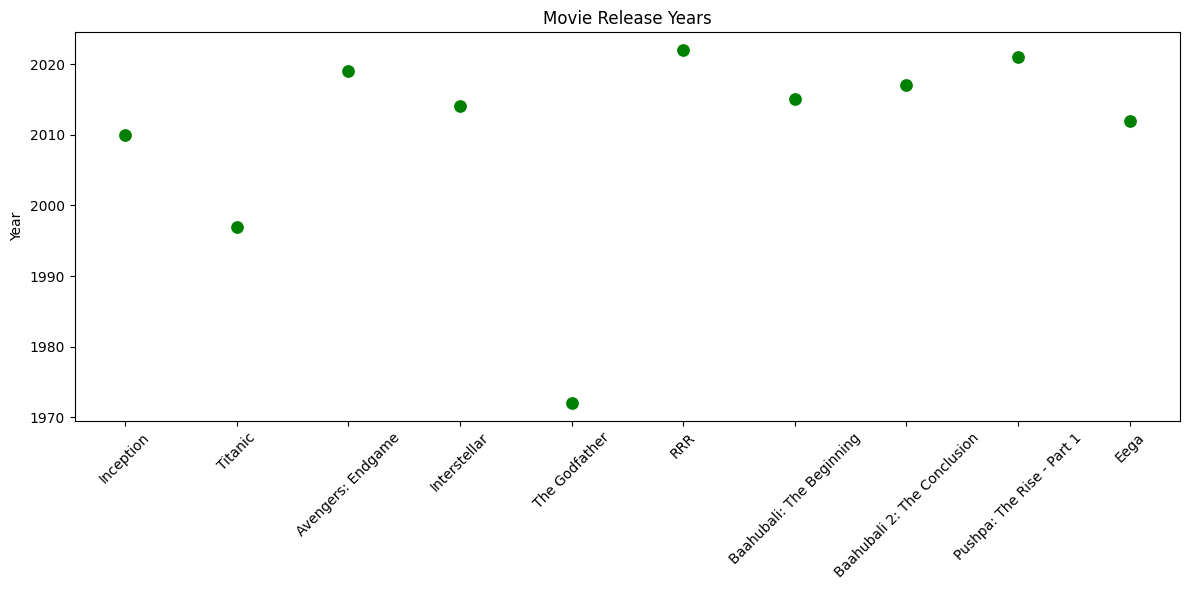

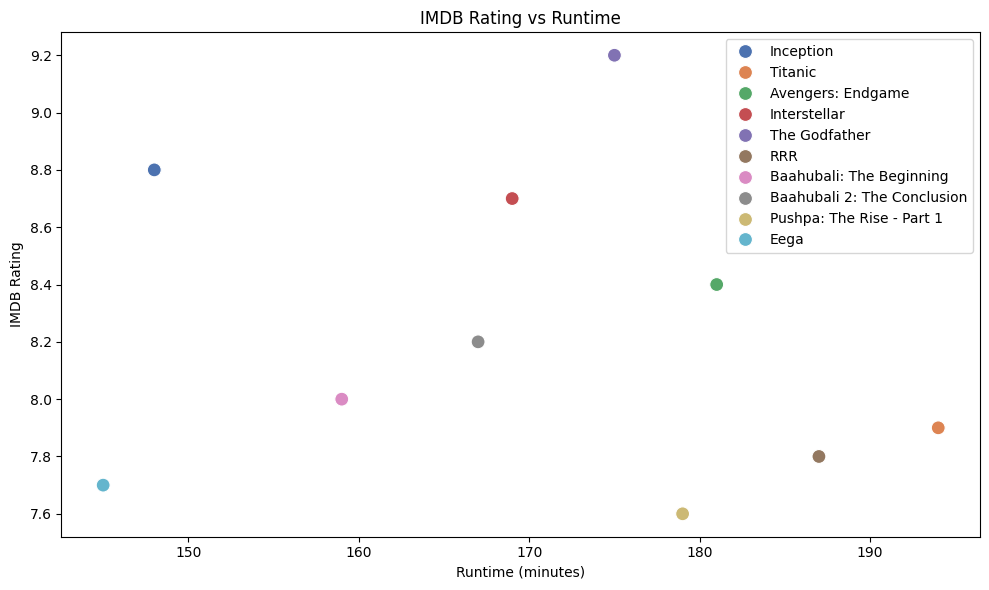

C:\Users\Durga Prasad\AppData\Local\Temp\ipykernel_27728\1564286860.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[g[0] for g in top_genres], y=[g[1] for g in top_genres], palette='rocket')


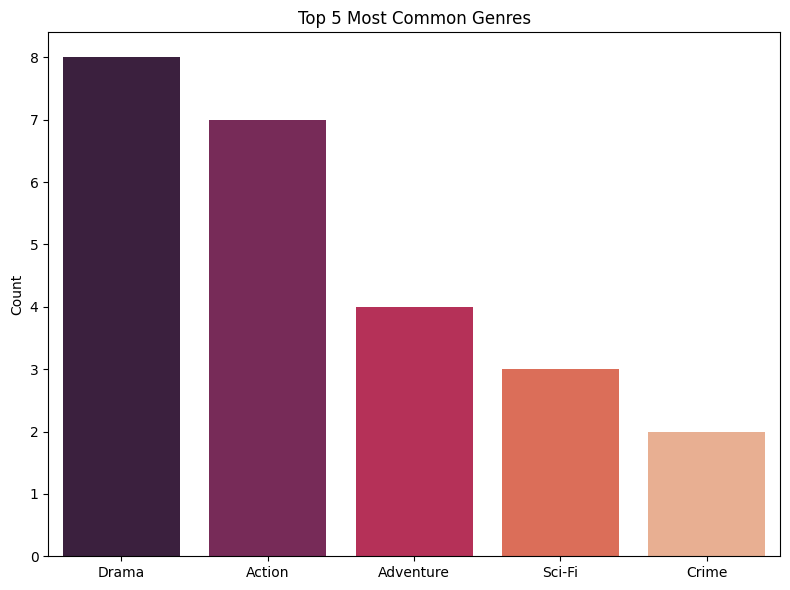

In [12]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

# 🔐 Replace with your actual OMDb API key
API_KEY = '6c153762'
base_url = 'http://www.omdbapi.com/'

# 🎬 Updated list with Tollywood & Hollywood movies
movies = [
    'Inception', 'Titanic', 'Avengers: Endgame', 'Interstellar', 'The Godfather',
    'RRR', 'Baahubali: The Beginning', 'Baahubali 2: The Conclusion',
    'Pushpa: The Rise', 'Eega'
]

movie_data = []

# 🔄 Fetch data from OMDb API
for title in movies:
    params = {
        't': title,
        'apikey': API_KEY
    }
    response = requests.get(base_url, params=params)
    data = response.json()
    
    if data['Response'] == 'True':
        try:
            movie_data.append({
                'Title': data['Title'],
                'Year': int(data['Year']),
                'IMDB Rating': float(data['imdbRating']),
                'Runtime': int(data['Runtime'].split()[0]) if data['Runtime'] != 'N/A' else 0,
                'Genre': data['Genre']
            })
        except:
            print(f"Skipped: {title} due to data format issues.")
    else:
        print(f"Movie not found: {title}")

# ✅ Separate values
titles = [m['Title'] for m in movie_data]
ratings = [m['IMDB Rating'] for m in movie_data]
runtimes = [m['Runtime'] for m in movie_data]
years = [m['Year'] for m in movie_data]
genres = [genre.strip() for m in movie_data for genre in m['Genre'].split(',')]

# 📊 Plot 1: IMDB Ratings
plt.figure(figsize=(12,6))
sns.barplot(x=titles, y=ratings, palette="viridis")
plt.title("IMDB Ratings of Movies")
plt.ylabel("IMDB Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📊 Plot 2: Runtime
plt.figure(figsize=(12,6))
sns.lineplot(x=titles, y=runtimes, marker='o', color='orange')
plt.title("Movie Runtimes")
plt.ylabel("Runtime (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📊 Plot 3: Genre Frequency
genre_count = Counter(genres)
plt.figure(figsize=(12,6))
sns.barplot(x=list(genre_count.keys()), y=list(genre_count.values()), palette="coolwarm")
plt.title("Genre Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📊 Plot 4: Movie Release Years
plt.figure(figsize=(12,6))
sns.scatterplot(x=titles, y=years, s=100, color='green')
plt.title("Movie Release Years")
plt.ylabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📊 Plot 5: IMDB Rating vs Runtime
plt.figure(figsize=(10,6))
sns.scatterplot(x=runtimes, y=ratings, hue=titles, s=100, palette='deep')
plt.title("IMDB Rating vs Runtime")
plt.xlabel("Runtime (minutes)")
plt.ylabel("IMDB Rating")
plt.tight_layout()
plt.show()

# 📊 Plot 6: Top 5 Most Common Genres
top_genres = genre_count.most_common(5)
plt.figure(figsize=(8,6))
sns.barplot(x=[g[0] for g in top_genres], y=[g[1] for g in top_genres], palette='rocket')
plt.title("Top 5 Most Common Genres")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


